In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
data_pom = pd.read_csv("./data/data_pom.csv")

In [3]:
data_pom

,GAME_ID,TEAM,OPPT,TEAM_SCORE,OPPT_SCORE,RESULT,SCORE_DIFF,PLAYER,MP,FG,...,TOV,PF,PLUS_MINUS,PTS,TOTAL_MINS,STARTER,DATE,MONTH,YEAR,POM
0,/boxscores/202002290MEM.html,Los Angeles Lakers,Memphis Grizzlies,88,105,L,-17,LeBron James,34.316667,8,...,5,1,-12,19,48,Starter,29/02/2020,2,2020,True
1,/boxscores/202002290BOS.html,Boston Celtics,Houston Rockets,110,111,L,-1,Jayson Tatum,44.566667,9,...,5,2,-5,32,53,Starter,29/02/2020,2,2020,True
2,/boxscores/202002260UTA.html,Boston Celtics,Utah Jazz,114,103,W,11,Jayson Tatum,38.416667,13,...,2,0,8,33,48,Starter,26/02/2020,2,2020,True
3,/boxscores/202002250POR.html,Boston Celtics,Portland Trail Blazers,118,106,W,12,Jayson Tatum,34.433333,14,...,2,1,22,36,48,Starter,25/02/2020,2,2020,True
4,/boxscores/202002250LAL.html,Los Angeles Lakers,New Orleans Pelicans,118,109,W,9,LeBron James,34.200000,17,...,7,1,12,40,48,Starter,25/02/2020,2,2020,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,/boxscores/199611080DET.html,Chicago Bulls,Detroit Pistons,98,80,W,18,Michael Jordan,35.716667,6,...,0,3,16,15,48,Starter,08/11/1996,11,1996,True
3499,/boxscores/199611060MIA.html,Chicago Bulls,Miami Heat,106,100,W,6,Michael Jordan,39.583333,18,...,0,1,9,50,48,Starter,06/11/1996,11,1996,True
3500,/boxscores/199611050CHI.html,Chicago Bulls,Vancouver Grizzlies,96,73,W,23,Michael Jordan,31.400000,9,...,4,2,24,22,48,Starter,05/11/1996,11,1996,True
3501,/boxscores/199611020CHI.html,Chicago Bulls,Philadelphia 76ers,115,86,W,29,Michael Jordan,30.316667,11,...,2,2,15,27,48,Starter,02/11/1996,11,1996,True


In [7]:
data_pom.columns

Index(['GAME_ID', 'TEAM', 'OPPT', 'TEAM_SCORE', 'OPPT_SCORE', 'RESULT',
       'SCORE_DIFF', 'PLAYER', 'MP', 'FG', 'FGA', 'FG3', 'FG3A', 'FT', 'FTA',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS',
       'PTS', 'TOTAL_MINS', 'STARTER', 'DATE', 'MONTH', 'YEAR', 'POM'],
      dtype='object')

#### Let's get some information about the ratio of field goals and 3-point shoots:

In [4]:
data_pom["FG%"] = data_pom["FG"]/data_pom["FGA"].round(1)
data_pom["FG3%"] = data_pom["FG3"]/data_pom["FG3A"].round(1)

## 1- Is there any correlation between some stats and POTM award?

#### Let's see the incidence of the third most important stats in the game in the determination of POTM:

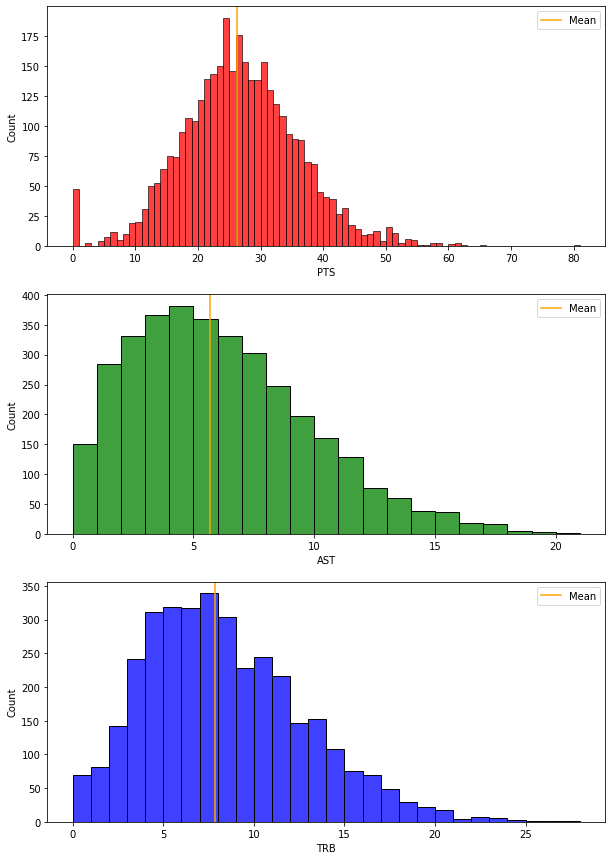

In [50]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.histplot(data_pom.PTS, ax=axs[0], binwidth=1, color="Red")
sns.histplot(data_pom.AST, ax=axs[1], binwidth=1, color="Green")
sns.histplot(data_pom.TRB, ax=axs[2], binwidth=1, color="Blue")

axs[0].axvline(data_pom.PTS.mean(), color="Orange", label="Mean")
axs[0].legend()
axs[1].axvline(data_pom.AST.mean(), color="Orange", label="Mean")
axs[1].legend()
axs[2].axvline(data_pom.TRB.mean(), color="Orange", label="Mean")
axs[2].legend()

#### In order of priority we can see that the most important stats to decide the player of the month is "Points made", then "Total Rebounds" and finally "Assists".

#### Now, let's check if shoot accuracy have some incidence in the decition too:

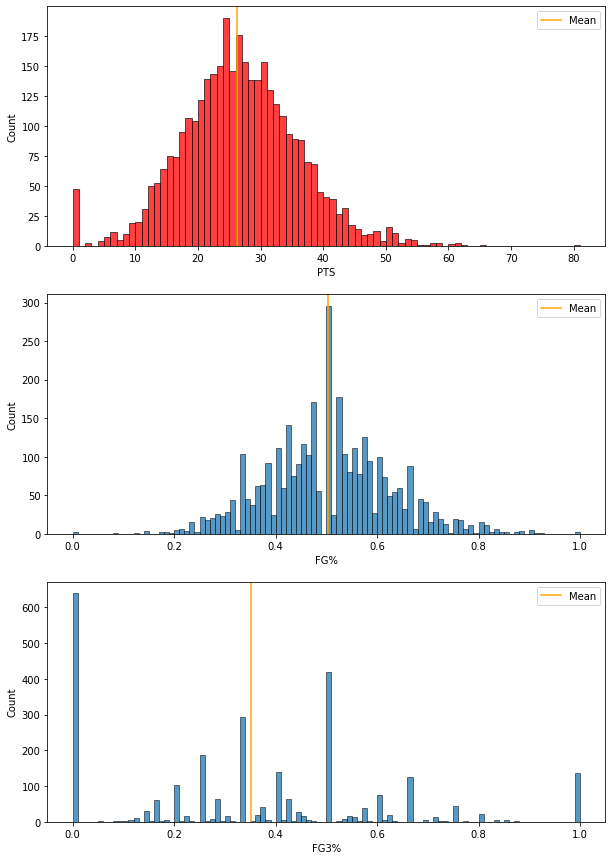

In [51]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.histplot(data_pom.PTS, ax=axs[0], binwidth=1, color="Red")
sns.histplot(data_pom["FG%"], ax=axs[1], binwidth=0.01)
sns.histplot(data_pom["FG3%"], ax=axs[2], binwidth=0.01)

axs[0].axvline(data_pom.PTS.mean(), color="Orange", label="Mean")
axs[0].legend()
axs[1].axvline(data_pom["FG%"].mean(), color="Orange", label="Mean")
axs[1].legend()
axs[2].axvline(data_pom["FG3%"].mean(), color="Orange", label="Mean")
axs[2].legend()

### We can assure that 3-point shot percentage has nothing to do with it, but we can see an strong correlation with "Points made" and a good (>= 50%) "Field Goals percentage".

## 2- Is there any YoY diference between POTM stats?

In [7]:
data_yoy = data_pom.groupby(["YEAR"])[["MP","PTS","AST","TRB"]].mean().round(2)

In [8]:
data_yoy.reset_index(drop = False, inplace = True)

In [9]:
data_yoy

,YEAR,MP,PTS,AST,TRB
0,1996,37.76,29.90,3.70,8.53
1,1997,39.44,25.51,5.00,6.16
2,1998,37.59,29.40,3.27,9.83
3,1999,38.96,24.38,4.58,9.34
4,2000,40.06,27.89,5.02,9.69
5,2001,40.33,26.95,4.82,7.92
6,2002,38.62,22.50,4.69,8.89
7,2003,40.03,26.53,4.85,10.01
8,2004,37.08,21.75,4.73,8.93
9,2005,37.14,25.70,4.38,8.70


In [18]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=data_yoy.YEAR,
    y=data_yoy.MP,
    name='Minutes Played',
    marker_color='indianred'
))

fig.add_trace(go.Bar(
    x=data_yoy.YEAR,
    y=data_yoy.PTS,
    name='Points Scored',
    marker_color='Steelblue'
))

fig.add_trace(go.Bar(
    x=data_yoy.YEAR,
    y=data_yoy.AST,
    name='Assits',
    marker_color='#e377c2'
))

fig.add_trace(go.Bar(
    x=data_yoy.YEAR,
    y=data_yoy.TRB,
    name='Total Rebound',
    marker_color='coral'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

#### We can perceive a clear tendency in decreasing the minutes played but increasing in "asissts".

# 3- Is there any MoM diference between POTM stats?

In [19]:
data_mom = data_pom.groupby(["MONTH"])[["MP","PTS","AST","TRB"]].mean().round(2)

In [21]:
data_mom.reset_index(drop = False, inplace = True)

In [22]:
data_mom

,MONTH,MP,PTS,AST,TRB
0,1,36.55,25.57,5.66,7.19
1,2,37.97,27.30,5.71,8.83
2,3,37.05,26.50,5.36,7.99
3,4,38.51,26.52,5.47,7.85
4,11,36.66,25.19,5.47,8.00
5,12,37.78,26.76,6.26,7.68


In [25]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=data_mom.MONTH,
    y=data_mom.MP,
    name='Minutes Played',
    marker_color='indianred'
))

fig.add_trace(go.Bar(
    x=data_mom.MONTH,
    y=data_mom.PTS,
    name='Points Scored',
    marker_color='Steelblue'
))

fig.add_trace(go.Bar(
    x=data_mom.MONTH,
    y=data_mom.AST,
    name='Assits',
    marker_color='#e377c2'
))

fig.add_trace(go.Bar(
    x=data_mom.MONTH,
    y=data_mom.TRB,
    name='Total Rebound',
    marker_color='coral'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

#### There is no difference between stats of the player of the month in each month of the year.

## 4- Taking in account what we investigate. Which are the minimum stats necessaries to be the player of the month with 90% of precision?

<AxesSubplot:ylabel='FG%'>

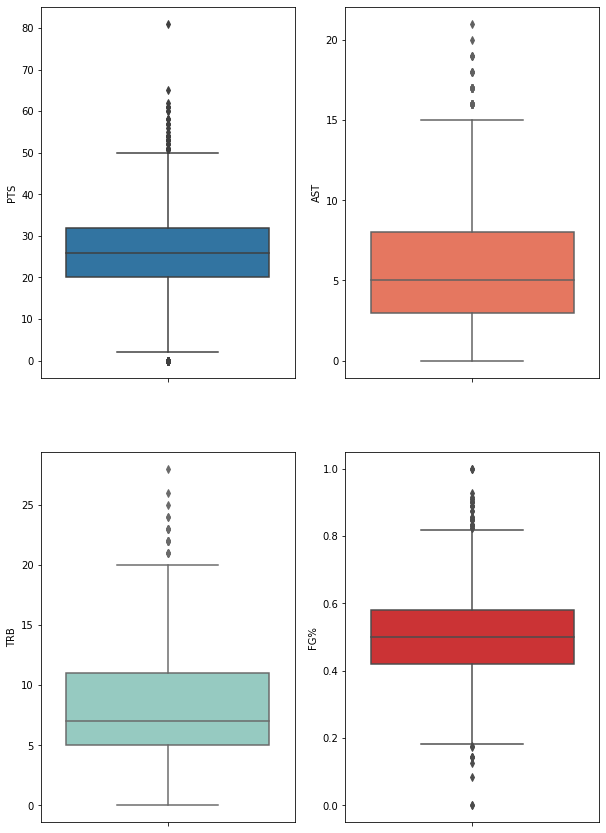

In [39]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 15))

sns.boxplot(data=data_pom, y=data_pom["PTS"], ax=axs[0,0])
sns.boxplot(data=data_pom, y=data_pom["AST"], ax=axs[0,1], palette="Reds")
sns.boxplot(data=data_pom, y=data_pom["TRB"], ax=axs[1,0], palette="Set3")
sns.boxplot(data=data_pom, y=data_pom["FG%"], ax=axs[1,1], palette="Set1")

In [42]:
POM_90 = [
    data_pom["PTS"].quantile(0.90),
    data_pom["AST"].quantile(0.90),
    data_pom["TRB"].quantile(0.90),
    data_pom["FG%"].quantile(0.90),
]

In [46]:
print(f"To be POTM with 90% percent of certainty you should have an average of {POM_90[0]} point, {POM_90[1]} assits, {POM_90[2]} total rebounds and {(POM_90[3] * 100).round(2)}% field goal percentage per game!")

To be POTM with 90% percent of certainty you should have an average of 38.0 point, 11.0 assits, 14.0 total rebounds and 66.67% field goal percentage per game!


#### To be POTM with 90% of percent of certainty you should have an average of 38.0 point, 11.0 assits, 14.0 total rebounds and 66.67% field goal percentage per game